# Corpus Mining!

In this notebook, we'll learn:

* How to use pandas, the "Python Data Analysis Library"
* How to make basic visualizations

## From texts to corpora

So far we've worked primarily with individual texts. When we have worked with multiple texts, we've often simply hand-replicated the analysis for each text. The most we've scaled up to automating our analysis on multiple texts is to loop over a list of texts.

Starting with this notebook, we're going to move from text analysis to corpus analysis. We'll still do the same kinds of text analysis we've been doing, but this time on many texts, and in such a way that our data analyses can be informed by the *metadata* we've collected on our corpora.

## Introduction to pandas

[Pandas](https://pandas.pydata.org/) is a very powerful software library for data analysis in Python. At the end of the day, though, think of it as **"Excel for robots"** (or Excel for Python). In other words, pandas lets Python think in terms of rows and columns. The "excel sheet" equivalent for pandas is the **DataFrame**.

Pandas can convert actual Excel files into its own dataframes very easily.

In [207]:
# To use pandas, first import it (it's traditional to import it in this way)
import pandas as pd

In [208]:
# Convert the actual excel file of Harry Potter's metadata to a pandas data frame ("df"_potter)
df_potter = pd.read_excel('../corpora/harry_potter/metadata.xls')

# Show 
df_potter

,fn,series_num,title,year
0,Sorcerers Stone.txt,1,Sorcerer's Stone,1997
1,Chamber of Secrets.txt,2,Chamber of Secrets,1998
2,Prisoner of Azkaban.txt,3,Prisoner of Azkaban,1999
3,Goblet of Fire.txt,4,Goblet of Fire,2000
4,Order of the Phoenix.txt,5,Order of the Phoenix,2003
5,Half-Blood Prince.txt,6,Half-Blood Prince,2005
6,Deathly Hallows.txt,7,Deathly Hallows,2007


In [209]:
# Convert the actual excel file of Tropic of Orange's metadata to a pandas data frame
df_tropic = pd.read_excel('../corpora/tropic_of_orange/metadata.xls')

# Show
df_tropic

,fn,part,part_day,part_title,chapter,chapter_title,setting,narrator
0,ch01.txt,1,Monday,Summer Solstice,1,Midday,Not Too Far From Mazatlán,Rafaela Cortes
1,ch02.txt,1,Monday,Summer Solstice,2,Benefits,Koreatown,Bobby Ngu
2,ch03.txt,1,Monday,Summer Solstice,3,Weather Report,Westside,Emi
3,ch04.txt,1,Monday,Summer Solstice,4,Station ID,Jefferson & Normandie,Buzzworm
4,ch05.txt,1,Monday,Summer Solstice,5,Traffic Window,Harbor Freeway,Manzanar Murakami
5,ch06.txt,1,Monday,Summer Solstice,6,Coffee Break,Downtown,Gabriel Balboa
6,ch07.txt,1,Monday,Summer Solstice,7,To Wake,The Marketplace,Arcangel
7,ch08.txt,2,Tuesday,Diamond Lane,8,Rideshare,Downtown Interchange,Manzanar Murakami
8,ch09.txt,2,Tuesday,Diamond Lane,9,NewsNow,Hollywood South,Emi
9,ch10.txt,2,Tuesday,Diamond Lane,10,Morning,En México,Rafaela Cortes


In [210]:
# @TODO: Open your own pandas dataframe from your own corpus (follow examples of above)
#

#df_mycorpus = 

## The Dataframe

Like an Excel sheet, a Pandas dataframe lets us access particular rows and columns of the data.

In [211]:
# Here's the entire data frame
df_potter

,fn,series_num,title,year
0,Sorcerers Stone.txt,1,Sorcerer's Stone,1997
1,Chamber of Secrets.txt,2,Chamber of Secrets,1998
2,Prisoner of Azkaban.txt,3,Prisoner of Azkaban,1999
3,Goblet of Fire.txt,4,Goblet of Fire,2000
4,Order of the Phoenix.txt,5,Order of the Phoenix,2003
5,Half-Blood Prince.txt,6,Half-Blood Prince,2005
6,Deathly Hallows.txt,7,Deathly Hallows,2007


### Getting columns

In [212]:
# What are the columns again?
df_potter.columns

Index(['fn', 'series_num', 'title', 'year'], dtype='object')

In [213]:
# Let's get the column for the title
df_potter['title']

0        Sorcerer's Stone
1      Chamber of Secrets
2     Prisoner of Azkaban
3          Goblet of Fire
4    Order of the Phoenix
5       Half-Blood Prince
6         Deathly Hallows
Name: title, dtype: object

In [214]:
# Another way to get a column
df_potter.title

0        Sorcerer's Stone
1      Chamber of Secrets
2     Prisoner of Azkaban
3          Goblet of Fire
4    Order of the Phoenix
5       Half-Blood Prince
6         Deathly Hallows
Name: title, dtype: object

In [215]:
# To make it a list:
list(df_potter['title'])

["Sorcerer's Stone",
 'Chamber of Secrets',
 'Prisoner of Azkaban',
 'Goblet of Fire',
 'Order of the Phoenix',
 'Half-Blood Prince',
 'Deathly Hallows']

In [216]:
# To loop over it:
for title in df_potter['title']:
    print(title)

Sorcerer's Stone
Chamber of Secrets
Prisoner of Azkaban
Goblet of Fire
Order of the Phoenix
Half-Blood Prince
Deathly Hallows


In [217]:
# @TODO: Print the column for the narrator in the Tropic of Orange metadata
#

In [218]:
# @TODO: Loop over the title column (or equivalent) in your own metadata, and print out the title
#

### Getting rows

In [219]:
# We can get rows numerically by their index using iloc
df_potter.iloc[0]

fn            Sorcerers Stone.txt
series_num                      1
title            Sorcerer's Stone
year                         1997
Name: 0, dtype: object

In [220]:
# Let's get the last row
df_potter.iloc[-1]

fn            Deathly Hallows.txt
series_num                      7
title             Deathly Hallows
year                         2007
Name: 6, dtype: object

In [221]:
# We can also SET a name for each row, and then use that as an index
df_potter.set_index('fn')

,series_num,title,year
fn,,,
Sorcerers Stone.txt,1,Sorcerer's Stone,1997
Chamber of Secrets.txt,2,Chamber of Secrets,1998
Prisoner of Azkaban.txt,3,Prisoner of Azkaban,1999
Goblet of Fire.txt,4,Goblet of Fire,2000
Order of the Phoenix.txt,5,Order of the Phoenix,2003
Half-Blood Prince.txt,6,Half-Blood Prince,2005
Deathly Hallows.txt,7,Deathly Hallows,2007


In [222]:
# Get the row for the Goblet of Fire
df_potter.set_index('fn').loc['Goblet of Fire.txt']

series_num                 4
title         Goblet of Fire
year                    2000
Name: Goblet of Fire.txt, dtype: object

In [223]:
# We have to overwrite the variable if we want the changes to save
df_potter

,fn,series_num,title,year
0,Sorcerers Stone.txt,1,Sorcerer's Stone,1997
1,Chamber of Secrets.txt,2,Chamber of Secrets,1998
2,Prisoner of Azkaban.txt,3,Prisoner of Azkaban,1999
3,Goblet of Fire.txt,4,Goblet of Fire,2000
4,Order of the Phoenix.txt,5,Order of the Phoenix,2003
5,Half-Blood Prince.txt,6,Half-Blood Prince,2005
6,Deathly Hallows.txt,7,Deathly Hallows,2007


In [224]:
# Overwrite the variable
df_potter = df_potter.set_index('fn')
df_potter

,series_num,title,year
fn,,,
Sorcerers Stone.txt,1,Sorcerer's Stone,1997
Chamber of Secrets.txt,2,Chamber of Secrets,1998
Prisoner of Azkaban.txt,3,Prisoner of Azkaban,1999
Goblet of Fire.txt,4,Goblet of Fire,2000
Order of the Phoenix.txt,5,Order of the Phoenix,2003
Half-Blood Prince.txt,6,Half-Blood Prince,2005
Deathly Hallows.txt,7,Deathly Hallows,2007


In [225]:
# Get the row for the Goblet of Fire
df_potter.loc['Goblet of Fire.txt']

series_num                 4
title         Goblet of Fire
year                    2000
Name: Goblet of Fire.txt, dtype: object

In [79]:
# @TODO: Get the row for the 30th chapter in Tropic of Orange
#

In [80]:
# @TODO: Get the row for the 4th text in your corpus
#

In [226]:
# @TODO: Set the index on Tropic of Orange's dataframe to be the filename
# Then get the row for ch14.txt
#

### Filtering rows/columns

The real power of pandas is that we can do filters quite easily. For instance, what if we want all the rows in the Tropic of Orange spreadsheet which are narrated by a particular character?

In [87]:
# Let's look at the entire Tropic of Orange data again
df_tropic

,fn,part,part_day,part_title,chapter,chapter_title,setting,narrator
0,ch01.txt,1,Monday,Summer Solstice,1,Midday,Not Too Far From Mazatlán,Rafaela Cortes
1,ch02.txt,1,Monday,Summer Solstice,2,Benefits,Koreatown,Bobby Ngu
2,ch03.txt,1,Monday,Summer Solstice,3,Weather Report,Westside,Emi
3,ch04.txt,1,Monday,Summer Solstice,4,Station ID,Jefferson & Normandie,Buzzworm
4,ch05.txt,1,Monday,Summer Solstice,5,Traffic Window,Harbor Freeway,Manzanar Murakami
5,ch06.txt,1,Monday,Summer Solstice,6,Coffee Break,Downtown,Gabriel Balboa
6,ch07.txt,1,Monday,Summer Solstice,7,To Wake,The Marketplace,Arcangel
7,ch08.txt,2,Tuesday,Diamond Lane,8,Rideshare,Downtown Interchange,Manzanar Murakami
8,ch09.txt,2,Tuesday,Diamond Lane,9,NewsNow,Hollywood South,Emi
9,ch10.txt,2,Tuesday,Diamond Lane,10,Morning,En México,Rafaela Cortes


In [91]:
# Let's look at the narrator column
df_tropic.narrator

0        Rafaela Cortes
1             Bobby Ngu
2                   Emi
3              Buzzworm
4     Manzanar Murakami
5        Gabriel Balboa
6              Arcangel
7     Manzanar Murakami
8                   Emi
9        Rafaela Cortes
10             Arcangel
11            Bobby Ngu
12             Buzzworm
13       Gabriel Balboa
14            Bobby Ngu
15             Buzzworm
16       Gabriel Balboa
17       Rafaela Cortes
18    Manzanar Murakami
19                  Emi
20             Arcangel
21             Buzzworm
22             Arcangel
23       Rafaela Cortes
24       Gabriel Balboa
25            Bobby Ngu
26                  Emi
27    Manzanar Murakami
28                  Emi
29       Rafaela Cortes
30             Buzzworm
31       Gabriel Balboa
32             Arcangel
33            Bobby Ngu
34    Manzanar Murakami
35             Arcangel
36             Buzzworm
37       Rafaela Cortes
38       Gabriel Balboa
39            Bobby Ngu
40                  Emi
41    Manzanar M

In [102]:
# What happens when we ask if the narrator is Emi?

df_tropic.narrator == 'Emi'

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26     True
27    False
28     True
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
41    False
42    False
43     True
44    False
45    False
46    False
47    False
48    False
Name: narrator, dtype: bool

In [109]:
# We can call this sequence something
chapter_narrated_by_emi = df_tropic.narrator == 'Emi'

In [110]:
# If we put this sequence of True/Falses inside the bracket notation for the dataframe...
df_tropic[ chapter_narrated_by_emi ]

,fn,part,part_day,part_title,chapter,chapter_title,setting,narrator
2,ch03.txt,1,Monday,Summer Solstice,3,Weather Report,Westside,Emi
8,ch09.txt,2,Tuesday,Diamond Lane,9,NewsNow,Hollywood South,Emi
19,ch20.txt,3,Wednesday,Cultural Diversity,20,Disaster Movie Week,Hiro's Sushi,Emi
26,ch27.txt,4,Thursday,The Eternal Buzz,27,Live on Air,El A,Emi
28,ch29.txt,5,Friday,Artificial Intelligence,29,Promos,World Wide Web,Emi
40,ch41.txt,6,Saturday,Queen of Angels,41,Prime Time,Last Stop,Emi
43,ch44.txt,7,Sunday,Pacific Rim,44,Commercial Break,The Big Sleep,Emi


In [227]:
# ...Then we see only those rows narrated by Emi.

# The above is equivalent to:
df_tropic[ df_tropic.narrator == 'Emi' ]

,fn,part,part_day,part_title,chapter,chapter_title,setting,narrator
2,ch03.txt,1,Monday,Summer Solstice,3,Weather Report,Westside,Emi
8,ch09.txt,2,Tuesday,Diamond Lane,9,NewsNow,Hollywood South,Emi
19,ch20.txt,3,Wednesday,Cultural Diversity,20,Disaster Movie Week,Hiro's Sushi,Emi
26,ch27.txt,4,Thursday,The Eternal Buzz,27,Live on Air,El A,Emi
28,ch29.txt,5,Friday,Artificial Intelligence,29,Promos,World Wide Web,Emi
40,ch41.txt,6,Saturday,Queen of Angels,41,Prime Time,Last Stop,Emi
43,ch44.txt,7,Sunday,Pacific Rim,44,Commercial Break,The Big Sleep,Emi


In [313]:
# We can call this filtered version of the data frame something
df_tropic_emi = df_tropic[ df_tropic.narrator == 'Emi' ]

In [314]:
# We can then get the filenames just for Emi's chapters
df_tropic_emi.fn

2     ch03.txt
8     ch09.txt
19    ch20.txt
26    ch27.txt
28    ch29.txt
40    ch41.txt
43    ch44.txt
Name: fn, dtype: object

In [315]:
# This is useful because then we can loop over an do things just to Emi's files:
for filename in df_tropic_emi.fn:
    # do something here!
    print(filename,'...')

ch03.txt ...
ch09.txt ...
ch20.txt ...
ch27.txt ...
ch29.txt ...
ch41.txt ...
ch44.txt ...


In [316]:
# @TODO: Filter the dataframe to show only Buzzworm's chapters
#

In [317]:
# @TODO: Filter the dataframe for 'part_title' as 'Artificial Intelligence'
#

In [318]:
# @TODO: Filter the dataframe for your own corpus in an interesting way
#

### Other ways to filter

In [319]:
# Get all rows NOT narrated by Emi
df_tropic[ df_tropic.narrator != 'Emi' ]

,fn,part,part_day,part_title,chapter,chapter_title,setting,narrator
0,ch01.txt,1,Monday,Summer Solstice,1,Midday,Not Too Far From Mazatlán,Rafaela Cortes
1,ch02.txt,1,Monday,Summer Solstice,2,Benefits,Koreatown,Bobby Ngu
3,ch04.txt,1,Monday,Summer Solstice,4,Station ID,Jefferson & Normandie,Buzzworm
4,ch05.txt,1,Monday,Summer Solstice,5,Traffic Window,Harbor Freeway,Manzanar Murakami
5,ch06.txt,1,Monday,Summer Solstice,6,Coffee Break,Downtown,Gabriel Balboa
6,ch07.txt,1,Monday,Summer Solstice,7,To Wake,The Marketplace,Arcangel
7,ch08.txt,2,Tuesday,Diamond Lane,8,Rideshare,Downtown Interchange,Manzanar Murakami
9,ch10.txt,2,Tuesday,Diamond Lane,10,Morning,En México,Rafaela Cortes
10,ch11.txt,2,Tuesday,Diamond Lane,11,To Wash,On the Tropic,Arcangel
11,ch12.txt,2,Tuesday,Diamond Lane,12,Car Payment Due,Tijuana via Singapore,Bobby Ngu


In [235]:
# Get all rows narrated by Emi or Gabriel
narrators_I_want = ['Emi','Gabriel Balboa']

df_tropic[ df_tropic.narrator.isin(narrators_I_want) ]  

,fn,part,part_day,part_title,chapter,chapter_title,setting,narrator
2,ch03.txt,1,Monday,Summer Solstice,3,Weather Report,Westside,Emi
5,ch06.txt,1,Monday,Summer Solstice,6,Coffee Break,Downtown,Gabriel Balboa
8,ch09.txt,2,Tuesday,Diamond Lane,9,NewsNow,Hollywood South,Emi
13,ch14.txt,2,Tuesday,Diamond Lane,14,Budgets,Skirting Downtown,Gabriel Balboa
16,ch17.txt,3,Wednesday,Cultural Diversity,17,The Interview,Manzanar,Gabriel Balboa
19,ch20.txt,3,Wednesday,Cultural Diversity,20,Disaster Movie Week,Hiro's Sushi,Emi
24,ch25.txt,4,Thursday,The Eternal Buzz,25,Time & a Half,Limousine Way,Gabriel Balboa
26,ch27.txt,4,Thursday,The Eternal Buzz,27,Live on Air,El A,Emi
28,ch29.txt,5,Friday,Artificial Intelligence,29,Promos,World Wide Web,Emi
31,ch32.txt,5,Friday,Artificial Intelligence,32,Overtime,El Zócalo,Gabriel Balboa


In [236]:
# Get all rows NOT narrated by Emi or Gabriel
df_tropic[ ~df_tropic.narrator.isin(narrators_I_want) ]  

,fn,part,part_day,part_title,chapter,chapter_title,setting,narrator
0,ch01.txt,1,Monday,Summer Solstice,1,Midday,Not Too Far From Mazatlán,Rafaela Cortes
1,ch02.txt,1,Monday,Summer Solstice,2,Benefits,Koreatown,Bobby Ngu
3,ch04.txt,1,Monday,Summer Solstice,4,Station ID,Jefferson & Normandie,Buzzworm
4,ch05.txt,1,Monday,Summer Solstice,5,Traffic Window,Harbor Freeway,Manzanar Murakami
6,ch07.txt,1,Monday,Summer Solstice,7,To Wake,The Marketplace,Arcangel
7,ch08.txt,2,Tuesday,Diamond Lane,8,Rideshare,Downtown Interchange,Manzanar Murakami
9,ch10.txt,2,Tuesday,Diamond Lane,10,Morning,En México,Rafaela Cortes
10,ch11.txt,2,Tuesday,Diamond Lane,11,To Wash,On the Tropic,Arcangel
11,ch12.txt,2,Tuesday,Diamond Lane,12,Car Payment Due,Tijuana via Singapore,Bobby Ngu
12,ch13.txt,2,Tuesday,Diamond Lane,13,Oldies,This Old Hood,Buzzworm


### Other dataframe methods

In [237]:
# What if I want to see all unique values of a column?

df_tropic.narrator.unique()

array(['Rafaela Cortes', 'Bobby Ngu', 'Emi', 'Buzzworm',
       'Manzanar Murakami', 'Gabriel Balboa', 'Arcangel'], dtype=object)

In [238]:
# What if I want to see how many times these unique values occur?

df_tropic.narrator.value_counts()

Bobby Ngu            7
Arcangel             7
Gabriel Balboa       7
Emi                  7
Manzanar Murakami    7
Rafaela Cortes       7
Buzzworm             7
Name: narrator, dtype: int64

In [239]:
# How often does each setting occur?
df_tropic.setting.value_counts()

Dirt Shoulder                     1
Mi Casa/Su Casa                   1
On the Tropic                     1
Tijuana via Singapore             1
The Other Side                    1
FreeZone                          1
Into the Boxes                    1
Not Too Far From Mazatlán         1
Downtown                          1
World Wide Web                    1
The World                         1
El Zócalo                         1
Limousine Way                     1
Downtown Interchange              1
Over the Net                      1
The Marketplace                   1
Margarita's Corner                1
Manzanar                          1
Final Destination                 1
To the Border                     1
Avoiding the Harbor               1
Virtually Everywhere              1
Greater L.A.                      1
Chinatown                         1
Pacific Rim Auditorium            1
The Rim                           1
Last Stop                         1
Harbor Freeway              

In [240]:
# We can sort a dataframe by its values
df_tropic.sort_values('narrator')

,fn,part,part_day,part_title,chapter,chapter_title,setting,narrator
22,ch23.txt,4,Thursday,The Eternal Buzz,23,To Labor,East & West Forever,Arcangel
32,ch33.txt,5,Friday,Artificial Intelligence,33,To Dream,America,Arcangel
46,ch47.txt,7,Sunday,Pacific Rim,47,To Die,Pacific Rim Auditorium,Arcangel
20,ch21.txt,3,Wednesday,Cultural Diversity,21,To Eat,La Cantina de Miseria y Hambre,Arcangel
6,ch07.txt,1,Monday,Summer Solstice,7,To Wake,The Marketplace,Arcangel
35,ch36.txt,6,Saturday,Queen of Angels,36,To Perform,Angel's Flight,Arcangel
10,ch11.txt,2,Tuesday,Diamond Lane,11,To Wash,On the Tropic,Arcangel
14,ch15.txt,3,Wednesday,Cultural Diversity,15,Second Mortgage,Chinatown,Bobby Ngu
39,ch40.txt,6,Saturday,Queen of Angels,40,Social Security,I-5,Bobby Ngu
11,ch12.txt,2,Tuesday,Diamond Lane,12,Car Payment Due,Tijuana via Singapore,Bobby Ngu


In [241]:
# Sort by two columns
df_tropic.sort_values(['narrator','chapter'])

,fn,part,part_day,part_title,chapter,chapter_title,setting,narrator
6,ch07.txt,1,Monday,Summer Solstice,7,To Wake,The Marketplace,Arcangel
10,ch11.txt,2,Tuesday,Diamond Lane,11,To Wash,On the Tropic,Arcangel
20,ch21.txt,3,Wednesday,Cultural Diversity,21,To Eat,La Cantina de Miseria y Hambre,Arcangel
22,ch23.txt,4,Thursday,The Eternal Buzz,23,To Labor,East & West Forever,Arcangel
32,ch33.txt,5,Friday,Artificial Intelligence,33,To Dream,America,Arcangel
35,ch36.txt,6,Saturday,Queen of Angels,36,To Perform,Angel's Flight,Arcangel
46,ch47.txt,7,Sunday,Pacific Rim,47,To Die,Pacific Rim Auditorium,Arcangel
1,ch02.txt,1,Monday,Summer Solstice,2,Benefits,Koreatown,Bobby Ngu
11,ch12.txt,2,Tuesday,Diamond Lane,12,Car Payment Due,Tijuana via Singapore,Bobby Ngu
14,ch15.txt,3,Wednesday,Cultural Diversity,15,Second Mortgage,Chinatown,Bobby Ngu


## Combining data + metadata

### Generating data the pandas way

In [271]:
def read(filename):
    with open(filename) as file:
        return file.read()

In [273]:
def is_punct(token):
    if token[0].isalpha():
        return False
    else:
        return True

In [274]:
def tokenize(text):
    import nltk
    tokens=nltk.word_tokenize(text.lower())
    
    tokens_nopunct=[]
    for token in tokens:
        # if punctuation?
        if not is_punct(token):
            tokens_nopunct.append(token)
    
    return tokens_nopunct

In [275]:
def count(tokens):
    from collections import Counter
    return Counter(tokens)

In [276]:
def tf(tokens):
    counts=count(tokens)
    num_words=len(tokens)
    for word in counts:
        counts[word] = counts[word] / num_words
    return counts

In [292]:
import os
textfolder_potter = '../corpora/harry_potter/texts/'

# make empty results list
results=[]

# loop over the filenames
for fn in df_potter.index:
    text_path = os.path.join(textfolder_potter, fn)
    
    # read file to string
    text_str = read(text_path)
    
    # tokenize string to list
    text_tokens = tokenize(text_str)
    
    # count list to dictionary
    text_counts = count(text_tokens)
    text_tf = tf(text_tokens)
    
    # make a new result dictionary, always include the filename!
    text_results = {'fn':fn}
    
    # let's add our results
    text_results['count_Harry'] = text_counts.get('harry',0)
    text_results['count_Hermione'] = text_counts.get('hermione',0)
    text_results['count_Ron'] = text_counts.get('ron',0)
    
    text_results['tf_Harry'] = text_tf.get('harry',0)
    text_results['tf_Hermione'] = text_tf.get('hermione',0)
    text_results['tf_Ron'] = text_tf.get('ron',0)
    text_results['tf_Voldemort'] = text_tf.get('voldemort',0)
    
    # print the results
    print(text_results)
    
    # add our results to the master results list
    results.append(text_results)

{'fn': 'Sorcerers Stone.txt', 'count_Harry': 718, 'count_Hermione': 56, 'count_Ron': 171, 'tf_Harry': 0.01579827495159303, 'tf_Hermione': 0.0012321774335504313, 'tf_Ron': 0.003762541806020067, 'tf_Voldemort': 0.00015402217919380392}
{'fn': 'Chamber of Secrets.txt', 'count_Harry': 1745, 'count_Hermione': 328, 'count_Ron': 722, 'tf_Harry': 0.018976054285652147, 'tf_Hermione': 0.0035668457339220077, 'tf_Ron': 0.007851410426499054, 'tf_Voldemort': 0.00029361230126797016}
{'fn': 'Prisoner of Azkaban.txt', 'count_Harry': 2055, 'count_Hermione': 670, 'count_Ron': 789, 'tf_Harry': 0.01782152458589888, 'tf_Hermione': 0.005810424074234672, 'tf_Ron': 0.006842424768016651, 'tf_Voldemort': 0.0004075969126701934}
{'fn': 'Goblet of Fire.txt', 'count_Harry': 3268, 'count_Hermione': 877, 'count_Ron': 1051, 'tf_Harry': 0.016151112736546094, 'tf_Hermione': 0.004334310241723049, 'tf_Ron': 0.005194253208723973, 'tf_Voldemort': 0.0011861282303461023}
{'fn': 'Order of the Phoenix.txt', 'count_Harry': 4087, '

In [293]:
# Now we can make a dataframe for just our results
df_results = pd.DataFrame(results)

# Show
df_results

,count_Harry,count_Hermione,count_Ron,fn,tf_Harry,tf_Hermione,tf_Ron,tf_Voldemort
0,718,56,171,Sorcerers Stone.txt,0.015798,0.001232,0.003763,0.000154
1,1745,328,722,Chamber of Secrets.txt,0.018976,0.003567,0.007851,0.000294
2,2055,670,789,Prisoner of Azkaban.txt,0.017822,0.005810,0.006842,0.000408
3,3268,877,1051,Goblet of Fire.txt,0.016151,0.004334,0.005194,0.001186
4,4087,1304,1302,Order of the Phoenix.txt,0.015163,0.004838,0.004830,0.000753
5,2771,692,877,Half-Blood Prince.txt,0.015638,0.003905,0.004949,0.001586
6,3137,1217,1175,Deathly Hallows.txt,0.015389,0.005970,0.005764,0.002168


In [294]:
# Let's set the index to filename also
df_results = df_results.set_index('fn')

In [295]:
# We can sort our results
df_results.sort_values('tf_Harry')

,count_Harry,count_Hermione,count_Ron,tf_Harry,tf_Hermione,tf_Ron,tf_Voldemort
fn,,,,,,,
Order of the Phoenix.txt,4087,1304,1302,0.015163,0.004838,0.004830,0.000753
Deathly Hallows.txt,3137,1217,1175,0.015389,0.005970,0.005764,0.002168
Half-Blood Prince.txt,2771,692,877,0.015638,0.003905,0.004949,0.001586
Sorcerers Stone.txt,718,56,171,0.015798,0.001232,0.003763,0.000154
Goblet of Fire.txt,3268,877,1051,0.016151,0.004334,0.005194,0.001186
Prisoner of Azkaban.txt,2055,670,789,0.017822,0.005810,0.006842,0.000408
Chamber of Secrets.txt,1745,328,722,0.018976,0.003567,0.007851,0.000294


In [296]:
# We can sort our results
df_results.sort_values('tf_Harry',ascending=False)

,count_Harry,count_Hermione,count_Ron,tf_Harry,tf_Hermione,tf_Ron,tf_Voldemort
fn,,,,,,,
Chamber of Secrets.txt,1745,328,722,0.018976,0.003567,0.007851,0.000294
Prisoner of Azkaban.txt,2055,670,789,0.017822,0.005810,0.006842,0.000408
Goblet of Fire.txt,3268,877,1051,0.016151,0.004334,0.005194,0.001186
Sorcerers Stone.txt,718,56,171,0.015798,0.001232,0.003763,0.000154
Half-Blood Prince.txt,2771,692,877,0.015638,0.003905,0.004949,0.001586
Deathly Hallows.txt,3137,1217,1175,0.015389,0.005970,0.005764,0.002168
Order of the Phoenix.txt,4087,1304,1302,0.015163,0.004838,0.004830,0.000753


In [297]:
# We can sort our results
df_results.sort_values('tf_Hermione',ascending=False)

,count_Harry,count_Hermione,count_Ron,tf_Harry,tf_Hermione,tf_Ron,tf_Voldemort
fn,,,,,,,
Deathly Hallows.txt,3137,1217,1175,0.015389,0.005970,0.005764,0.002168
Prisoner of Azkaban.txt,2055,670,789,0.017822,0.005810,0.006842,0.000408
Order of the Phoenix.txt,4087,1304,1302,0.015163,0.004838,0.004830,0.000753
Goblet of Fire.txt,3268,877,1051,0.016151,0.004334,0.005194,0.001186
Half-Blood Prince.txt,2771,692,877,0.015638,0.003905,0.004949,0.001586
Chamber of Secrets.txt,1745,328,722,0.018976,0.003567,0.007851,0.000294
Sorcerers Stone.txt,718,56,171,0.015798,0.001232,0.003763,0.000154


In [298]:
# We can sort our results
df_results.sort_values('tf_Ron',ascending=False)

,count_Harry,count_Hermione,count_Ron,tf_Harry,tf_Hermione,tf_Ron,tf_Voldemort
fn,,,,,,,
Chamber of Secrets.txt,1745,328,722,0.018976,0.003567,0.007851,0.000294
Prisoner of Azkaban.txt,2055,670,789,0.017822,0.005810,0.006842,0.000408
Deathly Hallows.txt,3137,1217,1175,0.015389,0.005970,0.005764,0.002168
Goblet of Fire.txt,3268,877,1051,0.016151,0.004334,0.005194,0.001186
Half-Blood Prince.txt,2771,692,877,0.015638,0.003905,0.004949,0.001586
Order of the Phoenix.txt,4087,1304,1302,0.015163,0.004838,0.004830,0.000753
Sorcerers Stone.txt,718,56,171,0.015798,0.001232,0.003763,0.000154


### Joining data to metadata

Here's a major payoff of using pandas to store our results. We can join them easily with our metadata!

In [299]:
# Here's our metadata again
df_potter

,series_num,title,year
fn,,,
Sorcerers Stone.txt,1,Sorcerer's Stone,1997
Chamber of Secrets.txt,2,Chamber of Secrets,1998
Prisoner of Azkaban.txt,3,Prisoner of Azkaban,1999
Goblet of Fire.txt,4,Goblet of Fire,2000
Order of the Phoenix.txt,5,Order of the Phoenix,2003
Half-Blood Prince.txt,6,Half-Blood Prince,2005
Deathly Hallows.txt,7,Deathly Hallows,2007


In [300]:
# Here's our data again
df_results

,count_Harry,count_Hermione,count_Ron,tf_Harry,tf_Hermione,tf_Ron,tf_Voldemort
fn,,,,,,,
Sorcerers Stone.txt,718,56,171,0.015798,0.001232,0.003763,0.000154
Chamber of Secrets.txt,1745,328,722,0.018976,0.003567,0.007851,0.000294
Prisoner of Azkaban.txt,2055,670,789,0.017822,0.005810,0.006842,0.000408
Goblet of Fire.txt,3268,877,1051,0.016151,0.004334,0.005194,0.001186
Order of the Phoenix.txt,4087,1304,1302,0.015163,0.004838,0.004830,0.000753
Half-Blood Prince.txt,2771,692,877,0.015638,0.003905,0.004949,0.001586
Deathly Hallows.txt,3137,1217,1175,0.015389,0.005970,0.005764,0.002168


In [301]:
# Let's join them!
df_potter.join(df_results)

,series_num,title,year,count_Harry,count_Hermione,count_Ron,tf_Harry,tf_Hermione,tf_Ron,tf_Voldemort
fn,,,,,,,,,,
Sorcerers Stone.txt,1,Sorcerer's Stone,1997,718,56,171,0.015798,0.001232,0.003763,0.000154
Chamber of Secrets.txt,2,Chamber of Secrets,1998,1745,328,722,0.018976,0.003567,0.007851,0.000294
Prisoner of Azkaban.txt,3,Prisoner of Azkaban,1999,2055,670,789,0.017822,0.005810,0.006842,0.000408
Goblet of Fire.txt,4,Goblet of Fire,2000,3268,877,1051,0.016151,0.004334,0.005194,0.001186
Order of the Phoenix.txt,5,Order of the Phoenix,2003,4087,1304,1302,0.015163,0.004838,0.004830,0.000753
Half-Blood Prince.txt,6,Half-Blood Prince,2005,2771,692,877,0.015638,0.003905,0.004949,0.001586
Deathly Hallows.txt,7,Deathly Hallows,2007,3137,1217,1175,0.015389,0.005970,0.005764,0.002168


In [302]:
# We can create a meta df with both metadata and data
df_meta = df_potter.join(df_results)

# show
df_meta

,series_num,title,year,count_Harry,count_Hermione,count_Ron,tf_Harry,tf_Hermione,tf_Ron,tf_Voldemort
fn,,,,,,,,,,
Sorcerers Stone.txt,1,Sorcerer's Stone,1997,718,56,171,0.015798,0.001232,0.003763,0.000154
Chamber of Secrets.txt,2,Chamber of Secrets,1998,1745,328,722,0.018976,0.003567,0.007851,0.000294
Prisoner of Azkaban.txt,3,Prisoner of Azkaban,1999,2055,670,789,0.017822,0.005810,0.006842,0.000408
Goblet of Fire.txt,4,Goblet of Fire,2000,3268,877,1051,0.016151,0.004334,0.005194,0.001186
Order of the Phoenix.txt,5,Order of the Phoenix,2003,4087,1304,1302,0.015163,0.004838,0.004830,0.000753
Half-Blood Prince.txt,6,Half-Blood Prince,2005,2771,692,877,0.015638,0.003905,0.004949,0.001586
Deathly Hallows.txt,7,Deathly Hallows,2007,3137,1217,1175,0.015389,0.005970,0.005764,0.002168


## Plotting

### Individual line plots

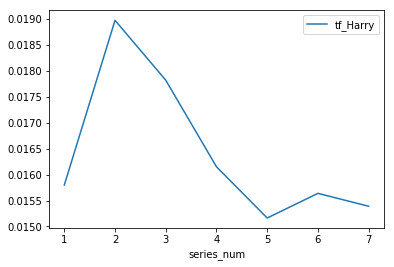

In [303]:
df_meta.plot(x='series_num',y='tf_Harry')

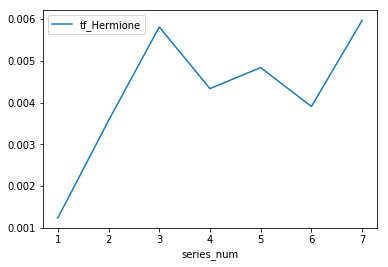

In [304]:
df_meta.plot(x='series_num',y='tf_Hermione')

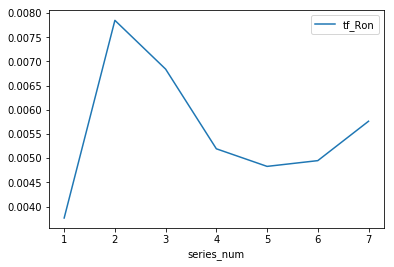

In [308]:
df_meta.plot(x='series_num',y='tf_Ron')

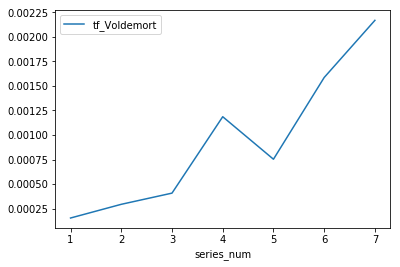

In [309]:
df_meta.plot(x='series_num',y='tf_Voldemort')

### Multiple

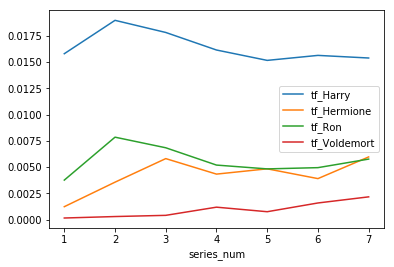

In [307]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

df_meta.plot(x='series_num',y='tf_Harry', ax=ax)
df_meta.plot(x='series_num',y='tf_Hermione', ax=ax)
df_meta.plot(x='series_num',y='tf_Ron', ax=ax)
df_meta.plot(x='series_num',y='tf_Voldemort', ax=ax)

## Classwork

In [311]:
## @TODO: Calculate the words per sentence and commas per sentence for each Harry Potter novel
# and visualize the results.
# 
# Please do not edit the results dataframe above but make a new results dataframe